# Les publications dans HAL de l'UL2, issues des financements de l'ANR
##  <center> <span style="color:red" > *Février 2023 (Version 2)* </span> </center> 
<center>  Université Lumière Lyon 2  </center>

- Le notebook décrit les différentes étapes d'extraction des publications de HAL
- On extrait les publications dans HAL(tous types) de l'Université Lyon 2 issues des financements de l'ANR¶
- On calcul le taux d'ouverture global pour ces documents ainsi que le taux d'ouverture par laboratoires.

In [4]:
import requests, json, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sns

## <span style="color:black" > 1 Les données </span>

### <span style="color:red" > 1.1 Construction du tableau </span>

In [5]:
##### L'identifiant structure de l'Université Lyon 2 est 33804

req = requests.get('https://api.archives-ouvertes.fr/search/?q=structId_i:33804&fq=anrProject_t:["" TO *]&rows=20000\
&fl=publicationDateY_i,docType_s,title_s,doiId_s,domainAllCode_s,\
domain_s,domain_t,primaryDomain_s,journalTitle_s, journalPublisher_s,journalIssn_s,language_s,instStructName_s,\
                     instStructId_i,instStructAcronym_s,anrProjectYearDate_s,anrProjectTitle_s,anrProjectTitle_t\
                      anrProjectTitleId_fs,anrProjectReference_t,anrProjectId_i,anrProjectCallTitle_s\
                      anrProjectCallAcronym_s,anrProjectAcronym_s,openAccess_bool,labStructAcronym_s,labStructName_s,\
                      labStructId_i,submittedDateY_i, submittedDate_s,submittedDate_tdate,submitType_s')
req_json = req.json()
anr_hal_lyon2_liste = req_json["response"]['docs']

In [6]:
anr_hal_lyon2 = pd.DataFrame(anr_hal_lyon2_liste)
anr_hal_lyon2 = anr_hal_lyon2.sort_values("publicationDateY_i", ascending = False)
anr_hal_lyon2.shape

(2759, 29)

In [96]:
##### Au 21 février 2023 il y a 2759 documents issus de projets ANR de l'Université Lyon 2 déposés dans HAL

In [7]:
anr_hal_lyon2.isnull().sum()

openAccess_bool               0
domainAllCode_s               4
domain_s                      4
primaryDomain_s               0
title_s                       0
journalTitle_s             1913
journalPublisher_s         1947
journalIssn_s              2011
anrProjectId_i                0
anrProjectTitle_s             6
anrProjectAcronym_s           0
anrProjectCallTitle_s      1525
anrProjectCallAcronym_s       0
anrProjectYearDate_s          0
anrProjectTitleId_fs          0
labStructId_i                 2
labStructAcronym_s            3
labStructName_s               2
instStructId_i                0
instStructAcronym_s           0
instStructName_s              0
language_s                    0
submitType_s                  0
docType_s                     0
doiId_s                    2049
submittedDate_tdate           0
submittedDate_s               0
submittedDateY_i              0
publicationDateY_i            0
dtype: int64

**Je retire les publications sans identifiants labo `labStructId_i`**

In [8]:
anr_hal_lyon2_labo = anr_hal_lyon2.dropna(subset='labStructId_i')
anr_hal_lyon2_labo.shape

(2757, 29)

In [9]:
anr_hal_lyon2_labo.isnull().sum()

openAccess_bool               0
domainAllCode_s               4
domain_s                      4
primaryDomain_s               0
title_s                       0
journalTitle_s             1913
journalPublisher_s         1947
journalIssn_s              2011
anrProjectId_i                0
anrProjectTitle_s             6
anrProjectAcronym_s           0
anrProjectCallTitle_s      1524
anrProjectCallAcronym_s       0
anrProjectYearDate_s          0
anrProjectTitleId_fs          0
labStructId_i                 0
labStructAcronym_s            1
labStructName_s               0
instStructId_i                0
instStructAcronym_s           0
instStructName_s              0
language_s                    0
submitType_s                  0
docType_s                     0
doiId_s                    2048
submittedDate_tdate           0
submittedDate_s               0
submittedDateY_i              0
publicationDateY_i            0
dtype: int64

In [10]:
anr_hal_lyon2_labo.dtypes

openAccess_bool              bool
domainAllCode_s            object
domain_s                   object
primaryDomain_s            object
title_s                    object
journalTitle_s             object
journalPublisher_s         object
journalIssn_s              object
anrProjectId_i             object
anrProjectTitle_s          object
anrProjectAcronym_s        object
anrProjectCallTitle_s      object
anrProjectCallAcronym_s    object
anrProjectYearDate_s       object
anrProjectTitleId_fs       object
labStructId_i              object
labStructAcronym_s         object
labStructName_s            object
instStructId_i             object
instStructAcronym_s        object
instStructName_s           object
language_s                 object
submitType_s               object
docType_s                  object
doiId_s                    object
submittedDate_tdate        object
submittedDate_s            object
submittedDateY_i            int64
publicationDateY_i          int64
dtype: object

In [11]:
anr_hal_lyon2_labo.head(2)

,openAccess_bool,domainAllCode_s,domain_s,primaryDomain_s,title_s,journalTitle_s,journalPublisher_s,journalIssn_s,anrProjectId_i,anrProjectTitle_s,anrProjectAcronym_s,anrProjectCallTitle_s,anrProjectCallAcronym_s,anrProjectYearDate_s,anrProjectTitleId_fs,labStructId_i,labStructAcronym_s,labStructName_s,instStructId_i,instStructAcronym_s,instStructName_s,language_s,submitType_s,docType_s,doiId_s,submittedDate_tdate,submittedDate_s,submittedDateY_i,publicationDateY_i
1091,True,"[info.info-it, info.info-ne]","[0.info, 1.info.info-it, 0.info, 1.info.info-ne]",info.info-it,[Approximation speed of quantized vs. unquanti...,IEEE Transactions on Information Theory,Institute of Electrical and Electronics Engineers,0018-9448,"[53265, 51743]","[Algorithmes, Approximations, Parcimonie et Pl...","[AllegroAssai, NuSCAP]",NaN,[Programme national pour l'Intelligence Artifi...,"[2019, 2020]","[Algorithmes, Approximations, Parcimonie et Pl...","[35418, 145352, 1096051, 35418, 1096051]","[LIP, IXXI, LIP]",[Laboratoire de l'Informatique du Parallélisme...,"[6818, 194495, 300009, 6818, 33804, 118744, 19...","[ENS Lyon, UCBL, Inria, ENS Lyon, UL2, UJML, U...","[École normale supérieure - Lyon, Université C...",[en],file,ART,10.1109/TIT.2023.3240360,2022-10-06T18:23:35Z,2022-10-06 18:23:35,2022,2023
2015,True,"[shs.geo, shs.archi, shs.droit]","[0.shs, 1.shs.geo, 0.shs, 1.shs.archi, 0.shs, ...",shs.geo,[Le plan local d'urbanisme : un champ d'extens...,Territoire en mouvement. Revue de Géographie e...,Université de Lille,1954-4863,[45553],"[Le "" PLU patrimonial "" : quels nouveaux outil...",[PLUPATRIMONIAL],NaN,[AAPG2015],[2015],"[Le "" PLU patrimonial "" : quels nouveaux outil...","[1005044, 199947, 190949, 1005040, 145345]","[GC (UMR_8504), CITERES, EIREST, PRODIG (UMR_8...","[Géographie-cités, Cités, Territoires, Environ...","[7550, 99539, 557826, 300298, 7550, 7550, 6787...","[UP1, EHESS, UPCité, UT, UP1, UP1, IRD, UPCité...","[Université Paris 1 Panthéon-Sorbonne, École d...",[fr],file,ART,10.4000/tem.8990,2022-09-22T16:32:16Z,2022-09-22 16:32:16,2022,2023


**Je selectionne les variables dont les valeurs n'ont pas de crochets, parmi les variables d'intérêt**

In [12]:
x = ['openAccess_bool', 'primaryDomain_s', 'journalTitle_s', 'journalPublisher_s', 'journalIssn_s', 'docType_s', \
     'publicationDateY_i', 'doiId_s', 'submitType_s', 'submittedDateY_i']

In [13]:
anr_hal_lyon2_labo_2 = anr_hal_lyon2_labo[x]

**Je retire les crochets des valeurs des variables d'intérêt**

In [14]:
### Variables de type charactère
dom_all = anr_hal_lyon2_labo["domainAllCode_s"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
dom = anr_hal_lyon2_labo["domain_s"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
titre = anr_hal_lyon2_labo["title_s"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
anr_titre = anr_hal_lyon2_labo["anrProjectTitleId_fs"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
anr_sigle = anr_hal_lyon2_labo["anrProjectCallAcronym_s"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
labo_sigle = anr_hal_lyon2_labo["labStructAcronym_s"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
labo_nom = anr_hal_lyon2_labo["labStructName_s"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
institution_sigle = anr_hal_lyon2_labo["instStructAcronym_s"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
institution_nom = anr_hal_lyon2_labo["instStructName_s"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
doc_langue = anr_hal_lyon2_labo["language_s"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)

### Variables de type objet
anr_id = anr_hal_lyon2_labo["anrProjectId_i"].apply(lambda x: ",".join(map(str,x)) if isinstance(x, list) else x)
anr_year = anr_hal_lyon2_labo["anrProjectYearDate_s"].apply(lambda x: ",".join(map(str,x)) if isinstance(x, list) else x)
labo_id = anr_hal_lyon2_labo["labStructId_i"].apply(lambda x: ",".join(map(str,x)) if isinstance(x, list) else x)
institution_id = anr_hal_lyon2_labo["instStructId_i"].apply(lambda x: ",".join(map(str,x)) if isinstance(x, list) else x)

In [15]:
### Dataframe
dom_all_df = pd.DataFrame(dom_all)
dom_df = pd.DataFrame(dom)
titre_df = pd.DataFrame(titre)
anr_titre_df = pd.DataFrame(anr_titre)
anr_sigle_df = pd.DataFrame(anr_sigle)
labo_sigle_df = pd.DataFrame(labo_sigle)
labo_nom_df = pd.DataFrame(labo_nom)
institution_sigle_df = pd.DataFrame(institution_sigle)
institution_nom_df = pd.DataFrame(institution_nom)
doc_langue_df = pd.DataFrame(doc_langue)
anr_id_df = pd.DataFrame(anr_id)
anr_year_df = pd.DataFrame(anr_year)
labo_id_df = pd.DataFrame(labo_id)
institution_id_df = pd.DataFrame(institution_id)

In [16]:
### Concaténation
frames = [anr_hal_lyon2_labo_2, dom_all_df, dom_df, titre_df,
                                   anr_titre_df,anr_sigle_df,labo_sigle_df,labo_nom_df,
                                   institution_sigle_df,institution_nom_df,doc_langue_df,
                                   anr_id_df,anr_year_df,labo_id_df,institution_id_df]
anr_hal_lyon2_labo_full = pd.concat(frames, axis=1)
anr_hal_lyon2_labo_full.head(2)

,openAccess_bool,primaryDomain_s,journalTitle_s,journalPublisher_s,journalIssn_s,docType_s,publicationDateY_i,doiId_s,submitType_s,submittedDateY_i,domainAllCode_s,domain_s,title_s,anrProjectTitleId_fs,anrProjectCallAcronym_s,labStructAcronym_s,labStructName_s,instStructAcronym_s,instStructName_s,language_s,anrProjectId_i,anrProjectYearDate_s,labStructId_i,instStructId_i
1091,True,info.info-it,IEEE Transactions on Information Theory,Institute of Electrical and Electronics Engineers,0018-9448,ART,2023,10.1109/TIT.2023.3240360,file,2022,"info.info-it,info.info-ne","0.info,1.info.info-it,0.info,1.info.info-ne",Approximation speed of quantized vs. unquantiz...,"Algorithmes, Approximations, Parcimonie et Plo...",Programme national pour l'Intelligence Artific...,"LIP,IXXI,LIP","Laboratoire de l'Informatique du Parallélisme,...","ENS Lyon,UCBL,Inria,ENS Lyon,UL2,UJML,UCBL,INS...","École normale supérieure - Lyon,Université Cla...",en,"53265,51743","2019,2020","35418,145352,1096051,35418,1096051","6818,194495,300009,6818,33804,118744,194495,21..."
2015,True,shs.geo,Territoire en mouvement. Revue de Géographie e...,Université de Lille,1954-4863,ART,2023,10.4000/tem.8990,file,2022,"shs.geo,shs.archi,shs.droit","0.shs,1.shs.geo,0.shs,1.shs.archi,0.shs,1.shs....",Le plan local d'urbanisme : un champ d'extensi...,"Le "" PLU patrimonial "" : quels nouveaux outils...",AAPG2015,"GC (UMR_8504),CITERES,EIREST,PRODIG (UMR_8586 ...","Géographie-cités,Cités, Territoires, Environne...","UP1,EHESS,UPCité,UT,UP1,UP1,IRD,UPCité,ENS Lyo...","Université Paris 1 Panthéon-Sorbonne,École des...",fr,45553,2015,"1005044,199947,190949,1005040,145345","7550,99539,557826,300298,7550,7550,67872,14811..."


In [47]:
anr_hal_lyon2_labo_full.shape

(2757, 24)

### <span style="color:red" > 1.2 Statistiques descriptives </span>

In [18]:
### Je transforme les variables de date en chaîne de caractere
anr_hal_lyon2_labo_full['publicationDateY_i']= anr_hal_lyon2_labo_full['publicationDateY_i'].map(str)
anr_hal_lyon2_labo_full['submittedDateY_i']= anr_hal_lyon2_labo_full['submittedDateY_i'].map(str)

#### <span style="color:orange" > 1.2.1 Types de documents </span>

In [36]:
tot_doctype = anr_hal_lyon2_labo_full.groupby(by="docType_s")['title_s'].count()
perc_doctype = anr_hal_lyon2_labo_full.docType_s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

In [44]:
tableau = pd.DataFrame({'Total': tot_doctype,'Pourcentage': perc_doctype})
tableau_bis = tableau.sort_values("Total", ascending = False)
tableau_bis

,Total,Pourcentage
COMM,1016,36.9%
ART,800,29.0%
COUV,374,13.6%
OUV,121,4.4%
REPORT,92,3.3%
UNDEFINED,78,2.8%
OTHER,64,2.3%
POSTER,48,1.7%
NOTICE,35,1.3%
ISSUE,33,1.2%


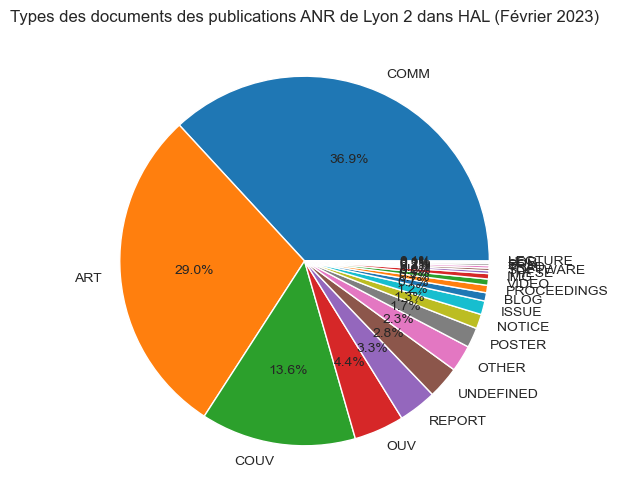

In [171]:
plot1 = tableau_bis['Total'].plot.pie(
    autopct="%.1f%%",
     fontsize=10,
    figsize=(6, 6),
    title="Types des documents des publications ANR de Lyon 2 dans HAL (Février 2023)", ylabel=''
  ); 

#### <span style="color:orange" > 1.2.2 Types de dépôts </span>

In [49]:
tot_submittype = anr_hal_lyon2_labo_full.groupby(by="submitType_s")['title_s'].count()
perc_submittype = anr_hal_lyon2_labo_full.submitType_s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
perc_submittype

notice    62.9%
file      35.3%
annex      1.7%
Name: submitType_s, dtype: object

In [50]:
tableau_2 = pd.DataFrame({'Total': tot_submittype,'Pourcentage': perc_submittype})
tableau_2

,Total,Pourcentage
annex,48,1.7%
file,974,35.3%
notice,1735,62.9%


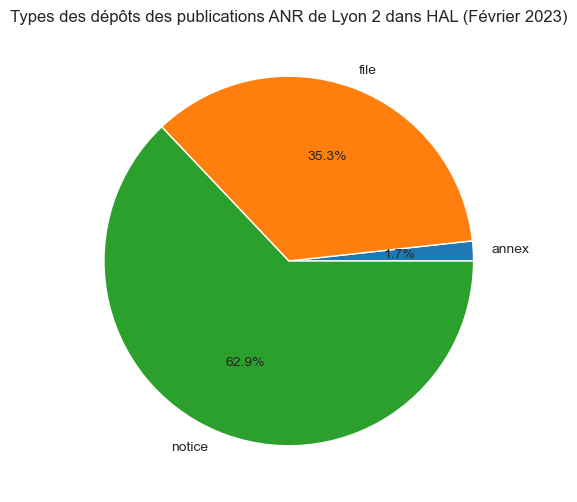

In [172]:
plot2 = tableau_2['Total'].plot.pie(
    autopct="%.1f%%",
     fontsize=10,
    figsize=(6, 6),
    title="Types des dépôts des publications ANR de Lyon 2 dans HAL (Février 2023)", ylabel=''
  ); 

In [58]:
anr_hal_lyon2_labo_full.groupby(["submitType_s", "openAccess_bool"])['title_s'].count()

submitType_s  openAccess_bool
annex         False                47
              True                  1
file          False                12
              True                962
notice        False              1575
              True                160
Name: title_s, dtype: int64

Le 21 février 2023, il y a 12 dépôts de type "file" qui sont en open access false, ils peuvent être retrouvés au lien suivant:

<center> <a href="https://hal.science/search/index/?q=anrProject_t%3A%2A&rows=30&openAccess_bool=false&structId_i=33804&submitType_s=file" target="_blank">File</a> </center> 

Sur ces 12 documents, 9 sont sous embargos (donc open access false justifié), 2 dont le lien "Télécharger pour visualiser" ne fonctionne pas, mais dont le texte peut être télécharger dans l'onglet "Fichiers et aperçu" (ces documents devraient donc être en open acces true), 1 document version postprint auteur qui devrait également être en open access true car le texte intégral est disponible au téléchargement.

Il y a également 1 dépôt de type "annex" dont le fichier est disponible au téléchargement. Ce dépôt devrait être de type "file", il peut être retrouvé au lien suivant:

<center> <a href="https://hal.science/search/index/?q=anrProject_t%3A%2A&rows=30&openAccess_bool=true&structId_i=33804&submitType_s=annex" target="_blank">Annex</a> </center> 

Nous faisons le choix de ne pas traiter les 3 dépôts "suspects" (ils ne concernent que 0,1% des dépôts de notre population et sont donc peu susceptibles d'influencer de manière fondamentale les résultats) et continuons l'analyse.

## <span style="color:black" > 2 Taux d'ouverture des publications issues des projets ANR de Lyon 2</span>

### <span style="color:red" > 2.1 Taux d'ouverture global </span>

In [67]:
s = anr_hal_lyon2_labo_full.openAccess_bool
s

1091     True
2015     True
771     False
1048     True
1735    False
        ...  
143     False
2562     True
1151    False
823      True
2296    False
Name: openAccess_bool, Length: 2757, dtype: bool

In [68]:
counts = s.value_counts()
counts

False    1634
True     1123
Name: openAccess_bool, dtype: int64

In [69]:
percent = s.value_counts(normalize=True)
percent

False    0.592673
True     0.407327
Name: openAccess_bool, dtype: float64

In [70]:
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percent100

False    59.3%
True     40.7%
Name: openAccess_bool, dtype: object

In [71]:
tableau_3 = pd.DataFrame({'Total': counts, 'Fréquence': percent, 'Pourcentage': percent100})
tableau_3

,Total,Fréquence,Pourcentage
False,1634,0.592673,59.3%
True,1123,0.407327,40.7%


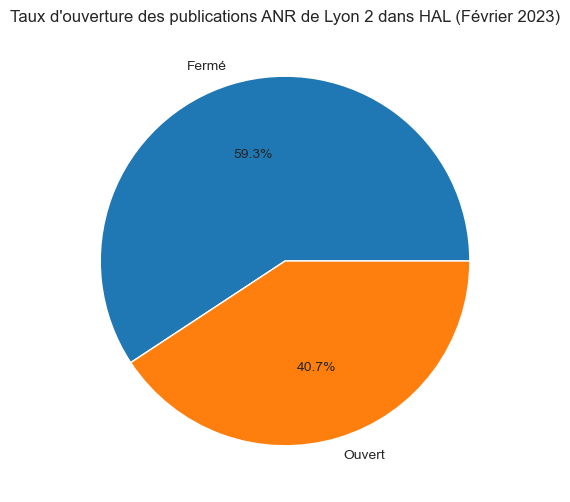

In [173]:
plot3 = tableau_3['Total'].plot.pie(
labels=["Fermé", "Ouvert"],
    autopct="%.1f%%",
     fontsize=10,
    figsize=(6, 6),
    title="Taux d'ouverture des publications ANR de Lyon 2 dans HAL (Février 2023)", ylabel=''
  ); 

### <span style="color:red" > 2.2 Taux d'ouverture par années de dépôt `(submittedDateY_i)` et années de publication `(publicationDateY_i)` </span>

Dans le cadre de la politique science ouverte de l'ANR, les bénéficiaires des projets financés se sont engagés, à partir de 2022, à:

*1 Rendre disponible en libre accès, toute publication scientifique issue d’un projet;*

*2 Déposer, au plus tard au moment de la publication, le texte intégral (manuscrit accepté pour publication ou version éditeur) dans l’archive ouverte HAL.*

*Source: <a href="https://anr.fr/fr/lanr/engagements/la-science-ouverte/" target="_blank">ANR</a>*

Quelle est l'influence de cette politique sur l'évolution des dépôts dans HAL à l'Université Lyon 2 ?

In [75]:
counts_2 = anr_hal_lyon2_labo_full.groupby('submittedDateY_i').openAccess_bool.value_counts()
counts_22 = anr_hal_lyon2_labo_full.groupby('publicationDateY_i').openAccess_bool.value_counts()
percent100_2 = anr_hal_lyon2_labo_full.groupby('submittedDateY_i').openAccess_bool.value_counts(normalize=True).mul(100).round(1).astype(str)
percent100_22 = anr_hal_lyon2_labo_full.groupby('publicationDateY_i').openAccess_bool.value_counts(normalize=True).mul(100).round(1).astype(str)

In [121]:
tableau_4 = pd.DataFrame({'Total': counts_2, 'Pourcentage': percent100_2}).reset_index()
tableau_5 = pd.DataFrame({'Total': counts_22, 'Pourcentage': percent100_22}).reset_index()
tableau_4_bis = tableau_4.rename(columns={"submittedDateY_i": "Année de dépôt", "openAccess_bool": "Accès"})
tableau_5_bis = tableau_5.rename(columns={"publicationDateY_i": "Année de publication", "openAccess_bool": "Accès"})

In [124]:
## Taux d'ouverture par année de dépôts
tableau_4_bis_2 = tableau_4_bis.copy()                                               
tableau_4_bis_2['Accès'] = tableau_4_bis_2['Accès'].map({True: 'Ouvert', False: 'Fermé'})
tableau_4_bis_2

,Année de dépôt,Accès,Total,Pourcentage
0,2007,Fermé,2,100.0
1,2008,Fermé,8,66.7
2,2008,Ouvert,4,33.3
3,2009,Fermé,43,67.2
4,2009,Ouvert,21,32.8
5,2010,Ouvert,29,61.7
6,2010,Fermé,18,38.3
7,2011,Ouvert,25,65.8
8,2011,Fermé,13,34.2
9,2012,Fermé,13,50.0


In [125]:
## Taux d'ouverture par année de publication
tableau_5_bis_2 = tableau_5_bis.copy()                                               
tableau_5_bis_2['Accès'] = tableau_5_bis_2['Accès'].map({True: 'Ouvert', False: 'Fermé'})
tableau_5_bis_2

,Année de publication,Accès,Total,Pourcentage
0,2000,Fermé,1,100.0
1,2001,Ouvert,1,100.0
2,2002,Fermé,1,50.0
3,2002,Ouvert,1,50.0
4,2005,Fermé,2,50.0
5,2005,Ouvert,2,50.0
6,2006,Fermé,3,75.0
7,2006,Ouvert,1,25.0
8,2007,Fermé,9,69.2
9,2007,Ouvert,4,30.8


In [126]:
tableau_4_bis_2['Pourcentage'] = tableau_4_bis_2['Pourcentage'].astype('float')
tableau_5_bis_2['Pourcentage'] = tableau_5_bis_2['Pourcentage'].astype('float')
tableau_4_bis_2.dtypes

Année de dépôt     object
Accès              object
Total               int64
Pourcentage       float64
dtype: object

In [127]:
tableau_5_bis_2.dtypes

Année de publication     object
Accès                    object
Total                     int64
Pourcentage             float64
dtype: object

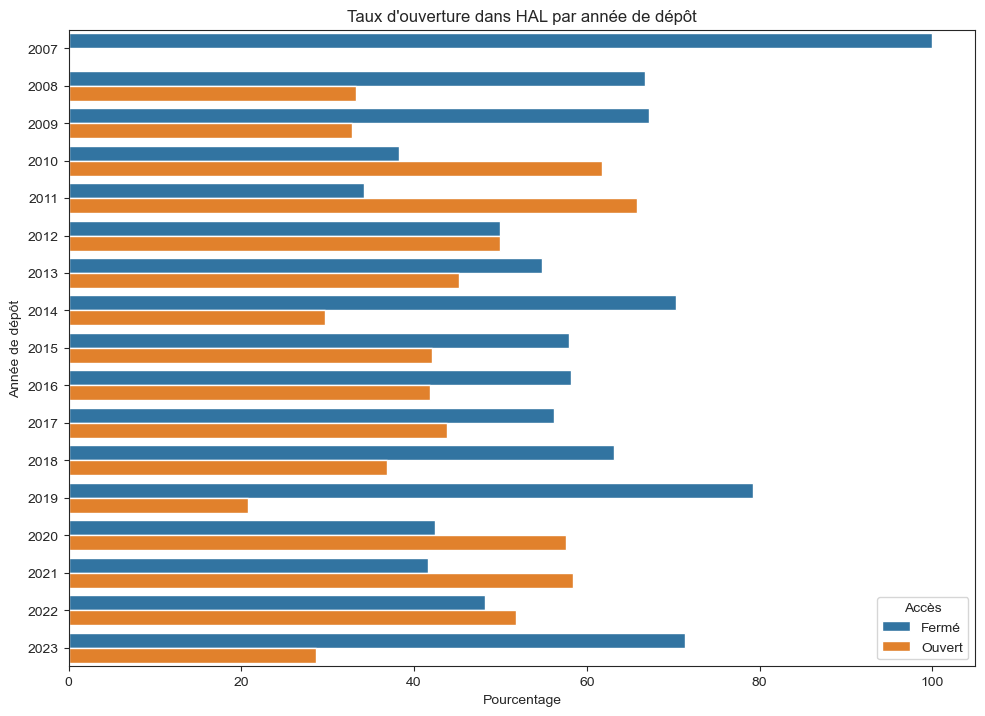

In [162]:
######## Graphique (année de dépôt)
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.barplot(data=tableau_4_bis_2, x="Pourcentage", y="Année de dépôt", hue="Accès").set(title="Taux d'ouverture dans HAL par année de dépôt")
plt.savefig('plot_4.png', dpi=400)

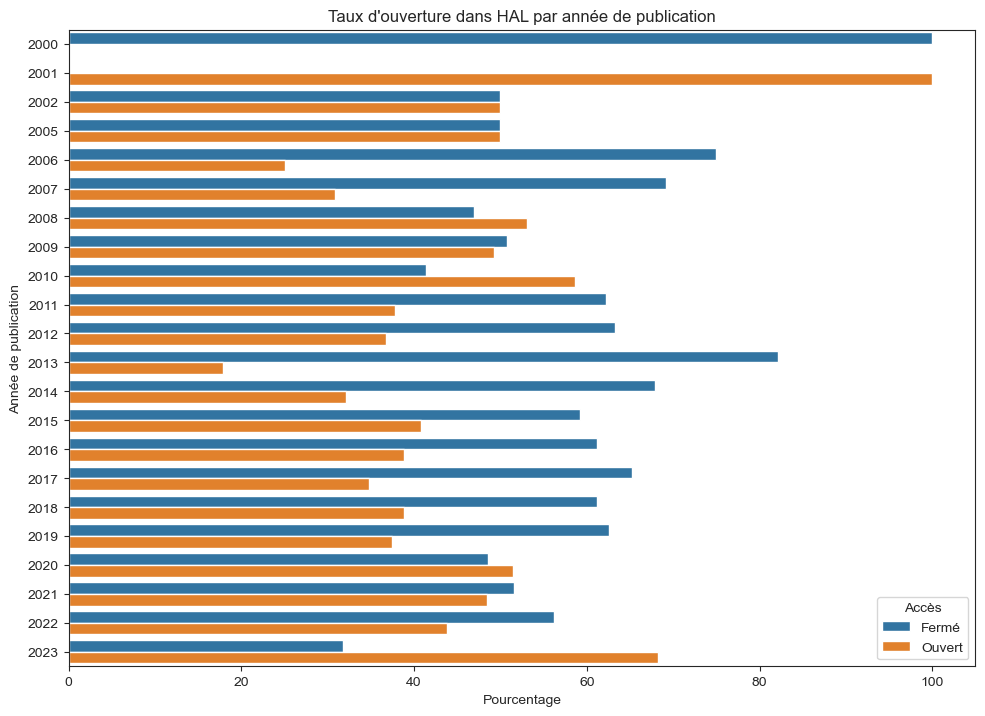

In [163]:
######## Graphique (année de publication)
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
plot5 = sns.barplot(data=tableau_5_bis_2, x="Pourcentage", y="Année de publication", hue="Accès").set(title="Taux d'ouverture dans HAL par année de publication")
plt.savefig('plot_5.png', dpi=400)

## <span style="color:black" > 3 Taux d'ouverture des publications issues des projets ANR par laboratoires de Lyon 2 </span>

### <span style="color:red" > 3.1 Le tableau </span>

In [109]:
# Les identifiants structure HAL des laboratoires de Lyon 2
Labo = ['619','444290','3131','1062481','146317','136794','88676','102810','191786','740','528282','145304','214341','70904',
'2562','183072','145345','102550','49955','670','567','51028','1063691','102816','498032','447425','1043116','89915',
'102818','2003','145356','145357']

In [110]:
data_per_labo = []
for i in Labo:
    table = anr_hal_lyon2_labo_full[anr_hal_lyon2_labo_full["labStructId_i"].str.contains(i)].assign(lab_id = i)  
    data_per_labo.append(table)
full_data = pd.concat(data_per_labo)

In [116]:
full_data.shape

(2405, 25)

In [113]:
#### Vérification ...
lab = ['145357']
filtre_lab = full_data[full_data['lab_id'].isin(lab)]
filtre_lab.shape

(109, 25)

In [114]:
#### ... identique à: (# Il y a 109 documents pour le laboratoire Triangle (labStructId_i = "145357"))
Triangle = anr_hal_lyon2_labo_full["labStructId_i"].str.contains('145357')
Triangle.value_counts()

False    2648
True      109
Name: labStructId_i, dtype: int64

In [120]:
tot_docperlab = full_data.groupby(by="lab_id")['title_s'].count()
tot_docperlab

lab_id
102550      49
102810       4
102816      16
102818       5
1043116     23
1062481      1
1063691     18
136794     114
145304       2
145345     316
145356       2
145357     109
146317      91
183072      17
191786       1
2003       416
214341      19
2562        22
3131         9
444290      34
447425       7
498032       2
49955       11
51028      737
528282       9
567         46
619         89
670         51
70904       27
740        139
88676       17
89915        2
Name: title_s, dtype: int64

### <span style="color:red" > 3.2 Résultats par laboratoires </span>

Afin de mieux cerner les effets de la politique science ouverte de l'ANR depuis 2022, peut-être est-il plus judicieux de retenir que les dates de dépôts `submittedDateY_i` 2022 et 2023. Nous faisons cependant le choix de garder toutes les périodes, au regard de la faiblesse des effectifs.

In [141]:
counts_3 = full_data.groupby('lab_id').openAccess_bool.value_counts()
percent100_3 = full_data.groupby('lab_id').openAccess_bool.value_counts(normalize=True).mul(100).round(1).astype(str)

In [142]:
tableau_6 = pd.DataFrame({'Total': counts_3, 'Pourcentage': percent100_3}).reset_index()
tableau_6_bis = tableau_6.rename(columns={"lab_id": "Identifiant HAL du labo", "openAccess_bool": "Accès"})

In [148]:
## Taux d'ouverture par laboratoire
tableau_6_bis_2 = tableau_6_bis.copy()                                               
tableau_6_bis_2['Accès'] = tableau_6_bis_2['Accès'].map({True: 'Ouvert', False: 'Fermé'})
tableau_6_bis_2.head()

,Identifiant HAL du labo,Accès,Total,Pourcentage
0,102550,Ouvert,42,85.7
1,102550,Fermé,7,14.3
2,102810,Fermé,3,75.0
3,102810,Ouvert,1,25.0
4,102816,Ouvert,12,75.0


In [149]:
tableau7 = pd.DataFrame({'Identifiant HAL du labo': ['619','444290','3131','1062481','146317','136794','88676','102810','191786','740','528282','145304','214341','70904',
'2562','183072','145345','102550','49955','670','567','51028','1063691','102816','498032','447425','1043116','89915',
'102818','2003','145356','145357'],
                    'Nom du labo': ['ARCHÉORIENT','ArAr','CERCRID','CERLA','CIHAM','CMW','COACTIS','CRPPC','DCT','DDL','DIPHE','DISP',
'ECP','ELICO','EMC','ERIC','EVS','GATE','GRePS','HISOMA','IAO','ICAR','IHRIM','IRAA','LADEC','LAET','LARHRA',
'LCE','LER','LIRIS','XXI','Triangle' ]})
tableau7.head()

,Identifiant HAL du labo,Nom du labo
0,619,ARCHÉORIENT
1,444290,ArAr
2,3131,CERCRID
3,1062481,CERLA
4,146317,CIHAM


In [150]:
tableau8 = pd.merge(tableau_6_bis_2, 
                     tableau7, 
                     on ='Identifiant HAL du labo', 
                     how ='left')
tableau8

,Identifiant HAL du labo,Accès,Total,Pourcentage,Nom du labo
0,102550,Ouvert,42,85.7,GATE
1,102550,Fermé,7,14.3,GATE
2,102810,Fermé,3,75.0,CRPPC
3,102810,Ouvert,1,25.0,CRPPC
4,102816,Ouvert,12,75.0,IRAA
5,102816,Fermé,4,25.0,IRAA
6,102818,Ouvert,4,80.0,LER
7,102818,Fermé,1,20.0,LER
8,1043116,Fermé,22,95.7,LARHRA
9,1043116,Ouvert,1,4.3,LARHRA


In [151]:
tableau8['Pourcentage'] = tableau8['Pourcentage'].astype('float')

In [ ]:

# Avec Seaborn
sns.set_style("whitegrid")
sns.set_context("paper")
#plt.figure(figsize=(20,10))
# line boxplot
plot_1_a = sns.lineplot(data=result_111)
# add label to the axis and label to the plot
plot_1_a.set(xlabel ="Année de publication", ylabel = "Nombre de publication")

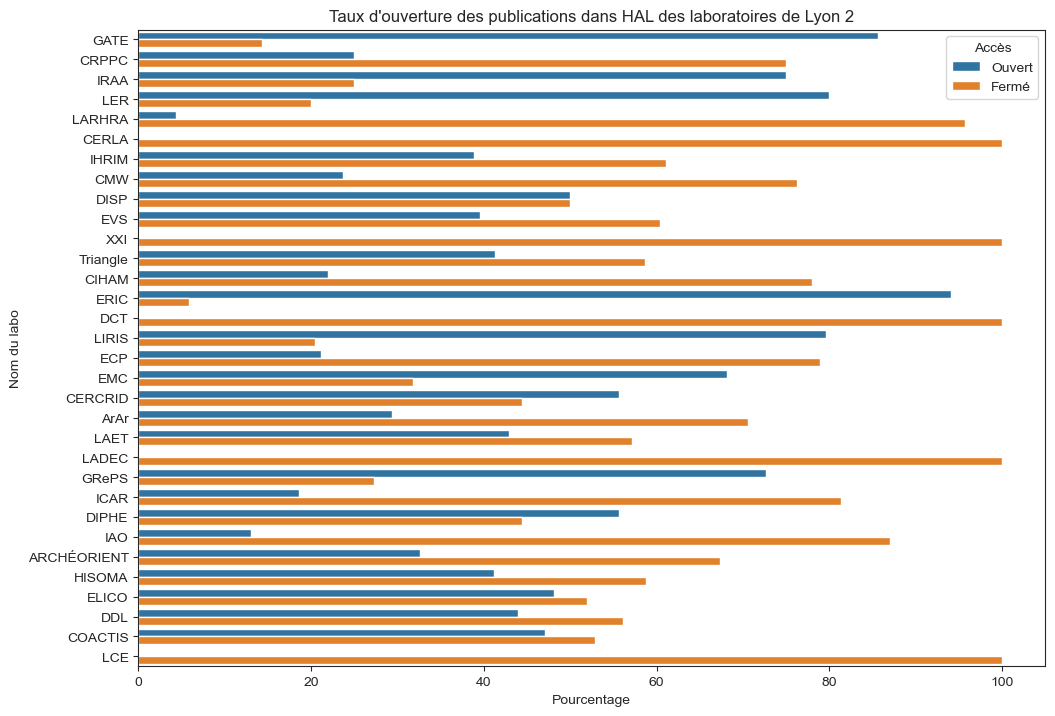

In [169]:
######## Graphique (répartition par labo)
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
plot6 = sns.barplot(data=tableau8, x="Pourcentage", y="Nom du labo", hue="Accès").set(title="Taux d'ouverture des publications dans HAL des laboratoires de Lyon 2")
plt.savefig('plot_6.png', dpi=400)

In [174]:
fig1 = plot1.get_figure()
fig1.savefig('plot_1.png', dpi=400)

fig2 = plot2.get_figure()
fig2.savefig('plot_2.png', dpi=400)

fig3 = plot3.get_figure()
fig3.savefig('plot_3.png', dpi=400)